In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [218]:
# Hyperparameters & Constants
FILEPATH = 'E:\Projects\TensorFlowPlayground\CIFAR10\cifar-10-python\cifar-10-batches-py'
CONFIDENCE_MARGIN = 1
STEP_SIZE = 0.01
REGULARIZATION_WEIGHT = 0.1
BATCH_SIZE = 128
EPOCH = 500

In [110]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
        features = dict[b'data']
        target = dict[b'labels']
    return features, target

In [260]:
class mutliclassSVM:
    
    def __init__(self, W, B, regularization="L1", polyDegree=3, lossMethod="SVMLoss", epoch=5, 
                 maxIter=1000, margin=1, alpha=0.001, beta=0.001):
        self.W = W
        self.B = B
        self.regularization = regularization
        self.polyDegree = polyDegree
        self.lossMethod = lossMethod
        self.margin = margin
        self.epoch = epoch
        self.alpha = alpha
        self.beta=beta
        return;
    
    def fit(self, xTrain, yTrain):
        loss = []
        for i in range(self.epoch):
            if (i == 250):
                self.alpha = self.alpha/2
            if (i == 300):
                 self.alpha = self.alpha/2
            if (i == 350):
                self.alpha = self.alpha/2
            if (i == 400):
                self.alpha = self.alpha/2
            yPredict = np.dot(xTrain, np.transpose(self.W)) + self.B
            loss.append(self.SVMLoss(yPredict, yTrain, 1))
            W, B = self.vanillaGD(yTrain, xTrain, yPredict, loss)
        return loss
        
    def SVMLoss(self, yPredict, yTrain, margin):
        #print(yPredict - yTrain + 1)
        loss = np.maximum(0, yPredict - yTrain + 1)
        loss[loss<0] = 0
        loss = loss.sum() / numberOfInputs
        return loss
    
    def vanillaGD(self, xTrain, yTrain, yPredict, loss):
        for i in range(xTrain.shape[1]):
            for j in range(10):
                if ((yPredict[i][j] - yTrain[i][j] + self.margin)>0):
                    biasGrad = ((yPredict[i][j] - yTrain[i][j] + self.margin) + self.beta + 2*self.beta*W[i][j])
                    weightGrad = (xTrain[i][j]*(yPredict[i][j] - yTrain[i][j] + self.margin) + 2*self.beta*W[i][j])
                else:
                    biasGrad = 0;
                    weightGrad = 0
                B[i][j] -= self.alpha*biasGrad
                W[i][j] -= self.alpha*weightGrad
        return W, B

In [251]:
# Import training and testing set
xTrain1, yTrain1 = unpickle(FILEPATH+'\\data_batch_1')
xTrain2, yTrain2 = unpickle(FILEPATH+'\\data_batch_2')
xTrain3, yTrain3 = unpickle(FILEPATH+'\\data_batch_3')
xTrain4, yTrain4 = unpickle(FILEPATH+'\\data_batch_4')
xTrain5, yTrain5 = unpickle(FILEPATH+'\\data_batch_5')
xTrain = np.concatenate((xTrain1, xTrain2, xTrain3, xTrain4, xTrain5))
yTrain = np.concatenate((yTrain1, yTrain2, yTrain3, yTrain4, yTrain5))
xTest, yTest = unpickle(FILEPATH+'\\test_batch')

In [252]:
# Normalization
xTrain = xTrain / 255
xTest = xTest / 255
xTrain.shape
numberOfInputs = xTrain.shape[0]

In [253]:
yTrainEncoded = np.zeros((numberOfInputs, len(np.unique(yTrain))))
for i in range(numberOfInputs):
    yTrainEncoded[i][yTrain[i]-1] = 1

yTestEncoded = np.zeros((xTest.shape[0], len(np.unique(yTest))))
for i in range(xTest.shape[0]):
    yTestEncoded[i][yTest[i]-1] = 1

In [258]:
# Initialize weights and bias
W = (np.random.rand(10, 3072)) 
B = np.zeros((numberOfInputs, 10))

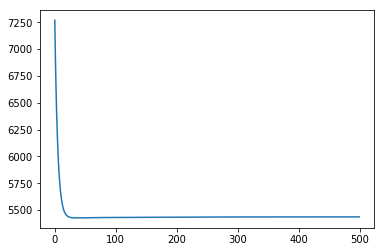

In [259]:
SVM = mutliclassSVM(W, B, polyDegree=2, margin=1, alpha=0.1, beta = 0.1, epoch=EPOCH)
loss = SVM.fit(xTrain, yTrainEncoded)
plt.plot(np.arange(EPOCH), loss)
plt.show()